In [25]:
import pandas as pd

In [26]:
data = pd.read_json('sale_data.json')

In [27]:
data.head()

,platform,link,price,address,description,housing_type,total_area,floor,total_floors,rooms_count,name,underground_name,underground_distance,published_at,latitude,longitude,payment_type,monthly_payment
0,domclick,https://domclick.ru/card/sale__flat__1987548956,22999990,"Россия, Москва, Ленинский проспект, 135к3",ОТЛИЧНОЕ ПРЕДЛОЖЕНИЕ! Успейте купить!\nПродает...,Квартира,73.0,5,16,3,"Сдается 3-комнатная, 73.0 м²",Тропарево,0.86,2023-12-08 15:15:48+00:00,55.641529,37.478307,premium,254921
1,domclick,https://domclick.ru/card/sale__flat__1999833410,8633000,"Россия, Москва, Ленинский проспект, 158",1414. Лот находится в платной брони.,Квартира,17.5,14,22,0,"Сдается 0-комнатная, 17.5 м²",Тропарево,1.30,2023-12-15 14:45:04.487887+00:00,55.651186,37.483095,premium,95684
2,domclick,https://domclick.ru/card/sale__flat__1889326688,14044800,"Россия, Москва, Суворовская улица, 19с2","Субсидированная ипотека от 12,8%! Акция ""Купи ...",Квартира,46.2,2,3,0,"Сдается 0-комнатная, 46.2 м²",Преображенская площадь,0.99,2023-10-07 21:41:51.530550+00:00,55.789709,37.708778,premium,155666
3,domclick,https://domclick.ru/card/sale__flat__1930836005,14300000,"Россия, Москва, Енисейская улица, 10",Продаётся уютная 3х комнатная квартира в 9-ти...,Квартира,50.5,2,9,3,"Сдается 3-комнатная, 50.5 м²",Свиблово,0.95,2023-11-05 08:52:00+00:00,55.860822,37.661230,premium,158494
4,domclick,https://domclick.ru/card/sale__flat__1964083748,7990000,"Россия, Москва, Электрозаводская улица, 14с1","Прекрасное предложение для тех, кто хочет полу...",Квартира,19.2,1,8,0,"Сдается 0-комнатная, 19.2 м²",Электрозаводская,0.98,2023-11-24 14:11:44.589536+00:00,55.787513,37.706766,premium,88557


In [28]:
# Удаляем бесполезные или нерелевантные признаки
data.drop(['platform', 'link', 'description', 'name', 'published_at', 'address'], axis=1, inplace=True)

In [29]:
# Заполним или удалим пустые значения
data.fillna(method='ffill', inplace=True)

In [30]:
data = pd.get_dummies(data, columns=['housing_type', 'payment_type', 'underground_name'])

In [31]:
data.head()

,price,total_area,floor,total_floors,rooms_count,underground_distance,latitude,longitude,monthly_payment,housing_type_Квартира,payment_type_premium,underground_name_Маяковская,underground_name_Нижегородская,underground_name_Преображенская площадь,underground_name_Саларьево,underground_name_Свиблово,underground_name_Селигерская,underground_name_Тропарево,underground_name_Электрозаводская,underground_name_станция Верхние Котлы
0,22999990,73.0,5,16,3,0.86,55.641529,37.478307,254921,True,True,False,False,False,False,False,False,True,False,False
1,8633000,17.5,14,22,0,1.30,55.651186,37.483095,95684,True,True,False,False,False,False,False,False,True,False,False
2,14044800,46.2,2,3,0,0.99,55.789709,37.708778,155666,True,True,False,False,True,False,False,False,False,False,False
3,14300000,50.5,2,9,3,0.95,55.860822,37.661230,158494,True,True,False,False,False,False,True,False,False,False,False
4,7990000,19.2,1,8,0,0.98,55.787513,37.706766,88557,True,True,False,False,False,False,False,False,False,True,False


In [32]:
# Целевая переменная (цена жилья)
y = data['price']

# Предикторы
X = data.drop('price', axis=1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
# Инициализация и обучение регрессионной модели
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.metrics import r2_score

In [38]:
# Предсказание цен для тестовой выборки
y_pred = model.predict(X_test)

In [39]:
# Вычисляем коэффициент детерминации R^2
score = r2_score(y_test, y_pred)
print(f'R^2: {score}')

R^2: 0.999999999998107


In [40]:
# Корреляция между факторами и ценой
correlations = data.corr()
print(correlations['price'].sort_values(ascending=False))

price                                      1.000000
monthly_payment                            1.000000
total_area                                 0.851973
floor                                      0.765272
rooms_count                                0.676910
underground_name_станция Верхние Котлы     0.579943
total_floors                               0.530374
longitude                                  0.222024
underground_name_Нижегородская             0.203716
underground_name_Тропарево                 0.121909
underground_name_Маяковская                0.109340
underground_name_Преображенская площадь    0.043098
underground_name_Свиблово                  0.042453
underground_name_Электрозаводская         -0.130015
underground_name_Саларьево                -0.160712
latitude                                  -0.198847
underground_name_Селигерская              -0.489315
underground_distance                      -0.529936
housing_type_Квартира                           NaN
payment_type

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

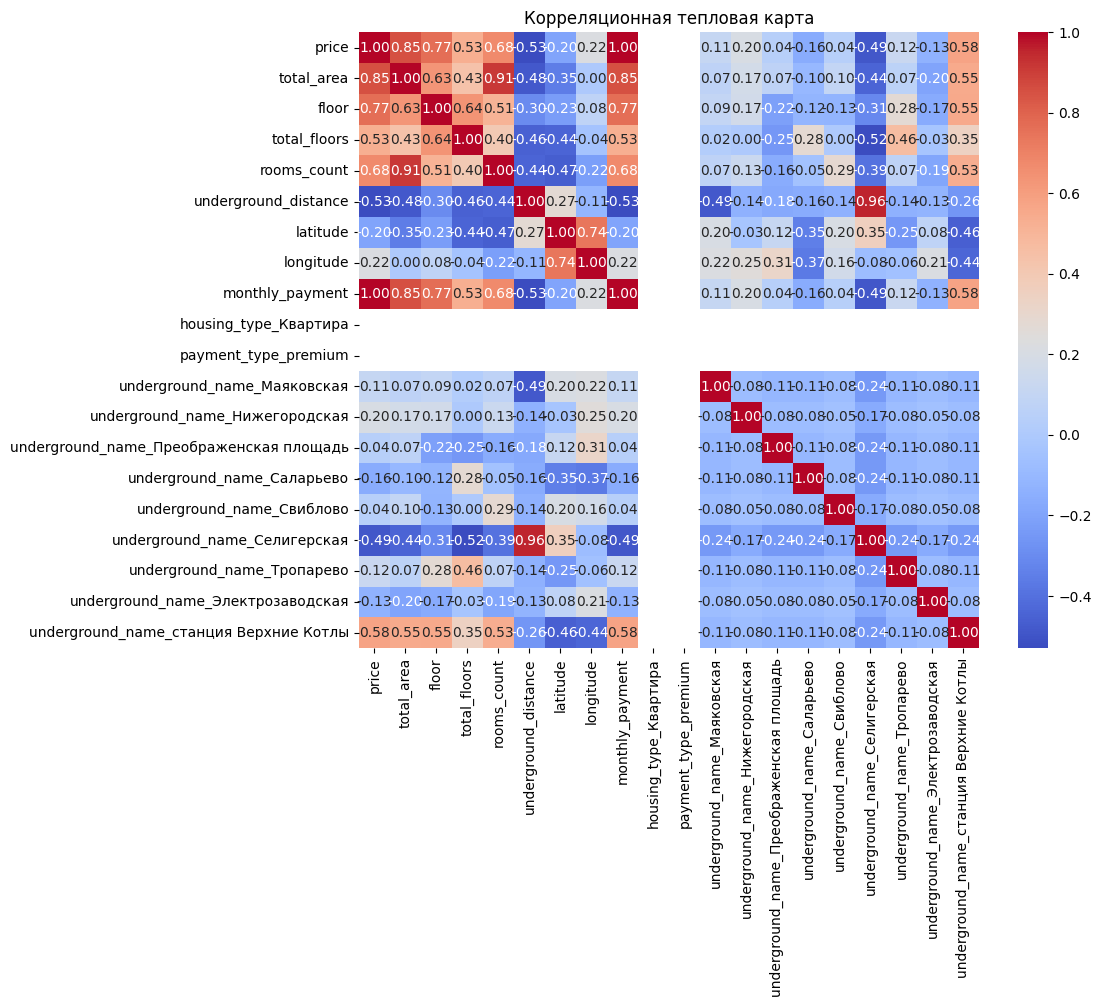

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная тепловая карта')
plt.show()